<a href="https://colab.research.google.com/github/ahmedimf1/DataScience/blob/master/EDA_HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Getting to know the data

In [ ]:
df_train = pd.read_csv('/content/House_prices/train.csv')
df_train.shape

(1460, 81)

In [ ]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

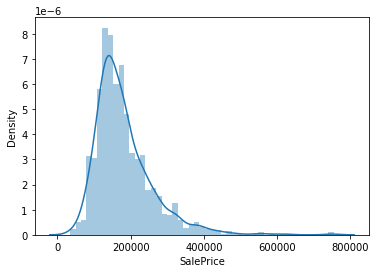

In [ ]:
sns.distplot(df_train['SalePrice'])

In [ ]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


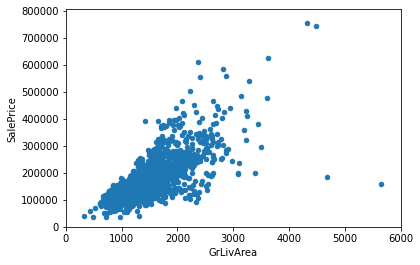

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis =1)
data.plot.scatter(x='GrLivArea', y='SalePrice', xlim = (0, 6000), ylim = (0, 805000))

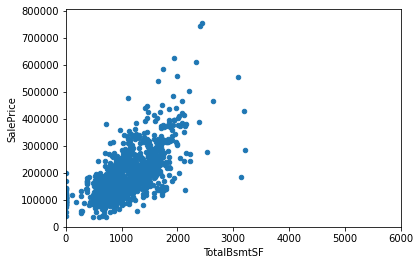

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis =1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', xlim = (0, 6000), ylim = (0, 805000))

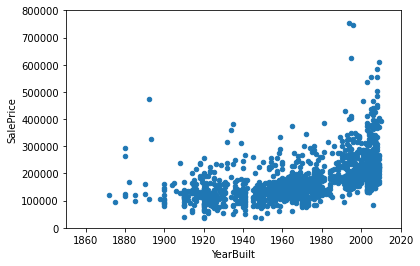

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis =1)
data.plot.scatter(x='YearBuilt', y='SalePrice', xlim = (1850, 2020), ylim = (0, 800000))

(-0.5, 9.5, 0.0, 800000.0)

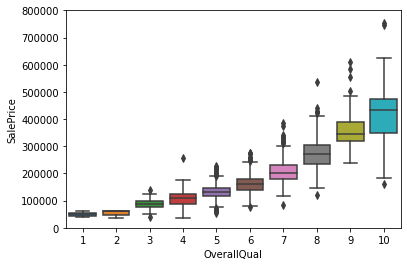

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis =1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

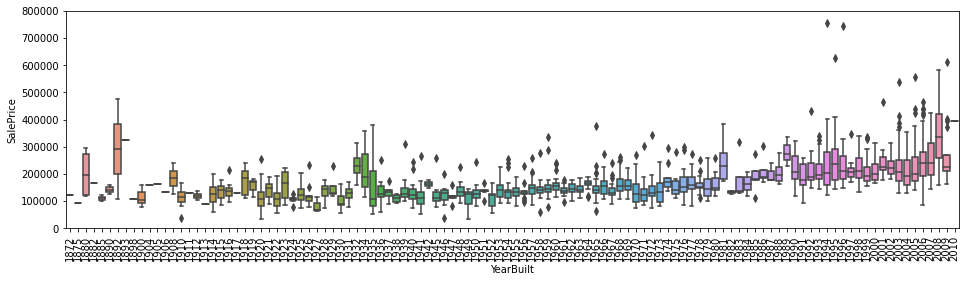

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 4))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Correlaion Matrix:

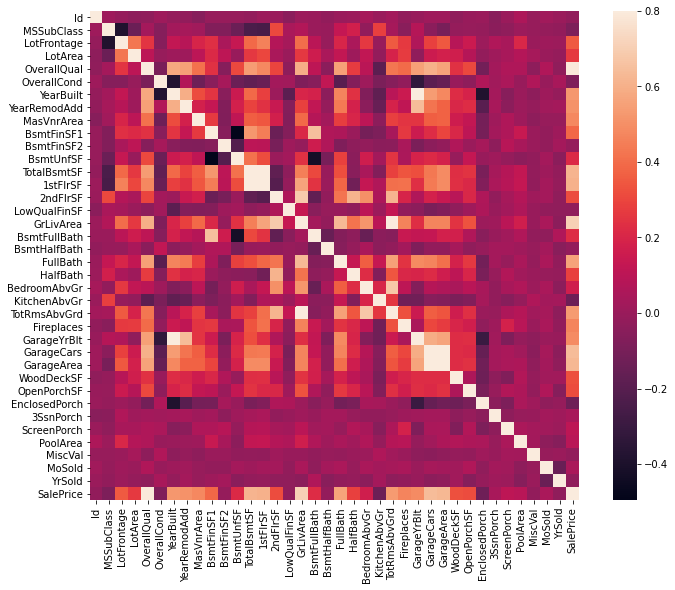

In [ ]:
cormat = df_train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(cormat, vmax=0.8, square = True)

Zoomed Heatmap (sale price)

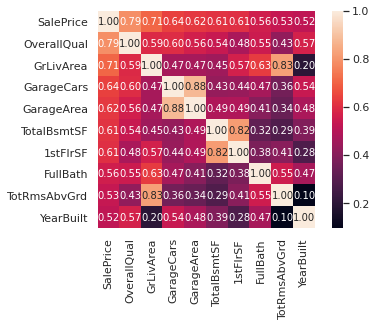

In [ ]:
k = 10
cols = cormat.nlargest(10, 'SalePrice')['SalePrice'].index
# cm = np.corrcoef(df_train[cols].values.T) #or df.corr()
sns.set(font_scale = 1.00)
hm = sns.heatmap(df_train[cols].corr(), cbar = True, annot = True, square = True, fmt = '.2f', 
# hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', 
annot_kws = {'size':10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

sns Scatterplots

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

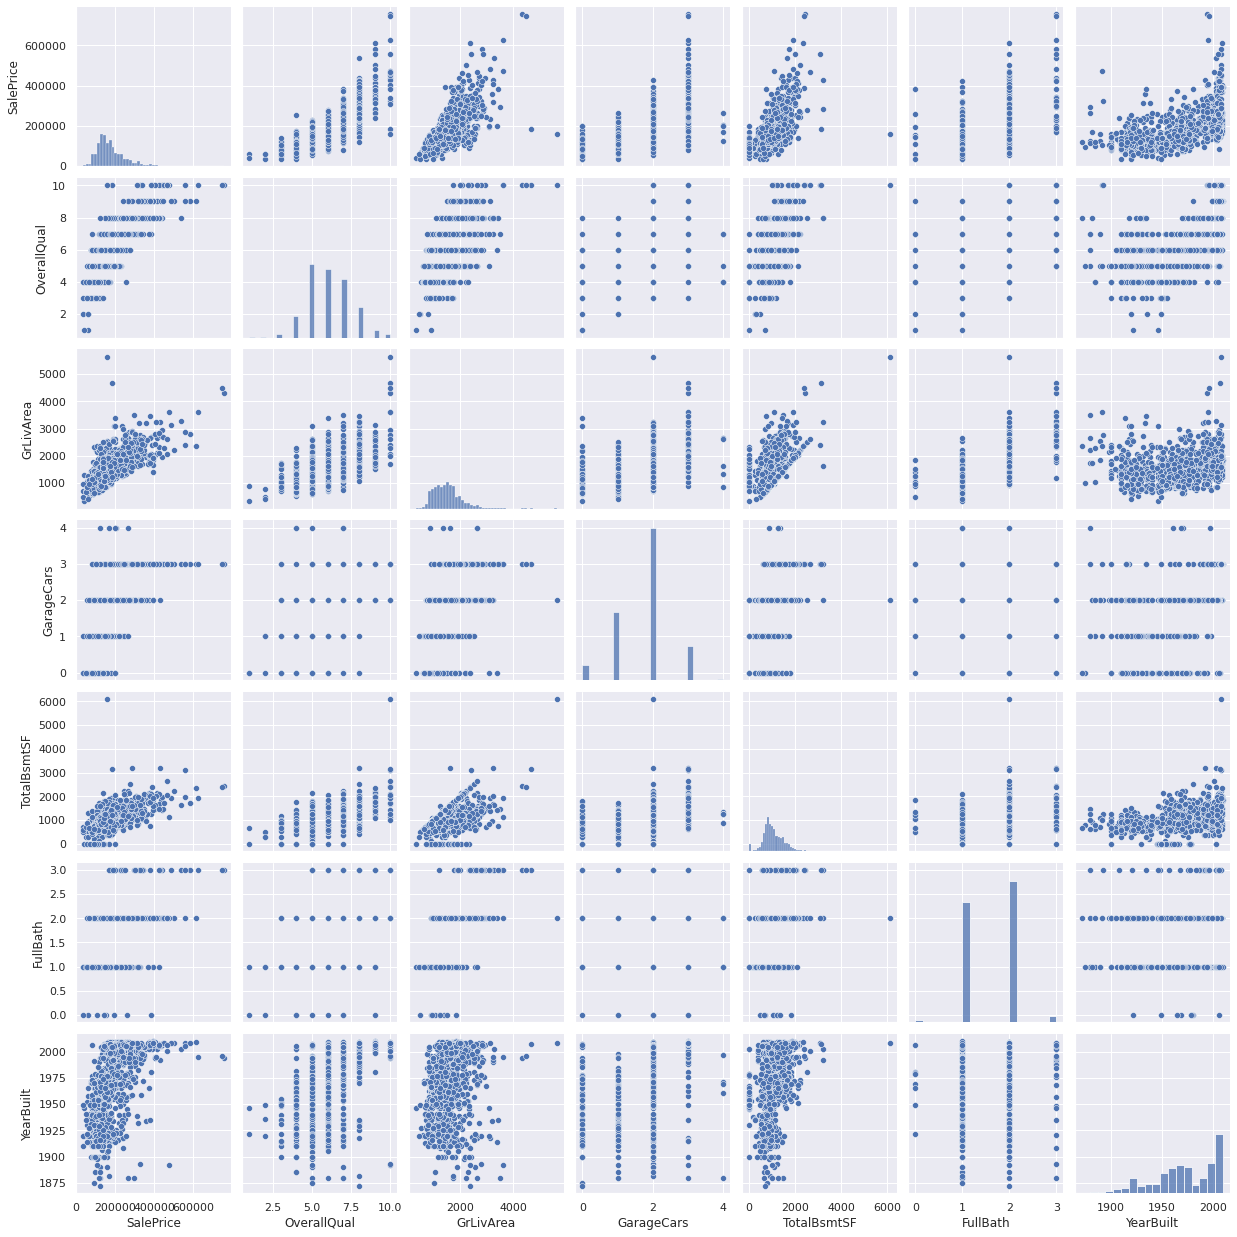

In [ ]:
sns.set()

##fix multicollinearity
# cols = cols.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'])
sns.pairplot(df_train[cols], size=2.5)
plt.show()

cleaning

In [ ]:
#missing data / more than 15% delete feature
total = df_train.isnull().sum().sort_values(ascending = False)
prcnt = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, prcnt], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [ ]:
# dropping columns with missing data 
df_train = df_train.drop((missing_data[missing_data['Total']> 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [ ]:
df_train.isnull().sum().max()

0

Outliers


univariate Analysis:

In [ ]:
# Standardizaton
salesprice_stdzed = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])
low_range = salesprice_stdzed[salesprice_stdzed[:,0].argsort()][:10]
high_range = salesprice_stdzed[salesprice_stdzed[:,0].argsort()][-10:]

print('lower range: \n')
print(low_range)
print('\nHigher range: \n')
print(high_range)

lower range: 

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

Higher range: 

[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


bivariate Analysis:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


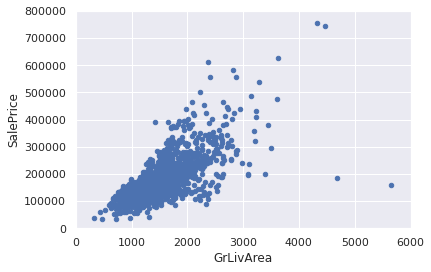

In [ ]:
#bivariate: saleprice/grlivarea
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', xlim=(0,6000),ylim=(0,800000));

In [ ]:
## delete the two outliers at the bottom of the plot
df_train.sort_values(by='GrLivArea', ascending= False)[:2].index
df_train = df_train.drop(df_train.sort_values(by='GrLivArea', ascending= False)[:2].index)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


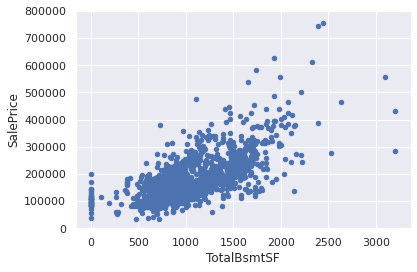

In [ ]:
#bivariate saleprice/TotalBsmtSF
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

Deep Dive

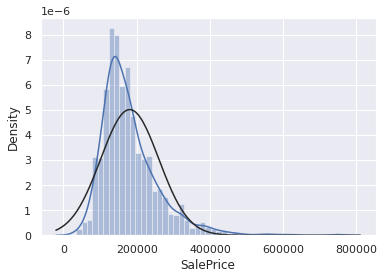

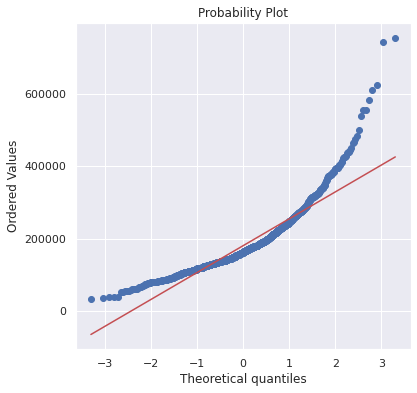

In [ ]:
#normal dist & Histogram plots
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure(figsize=(6,6))
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [ ]:
#Log transformation to fix +ve skewdness
df_train['SalePrice'] = np.log(df_train['SalePrice'])

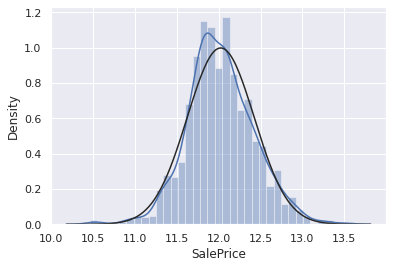

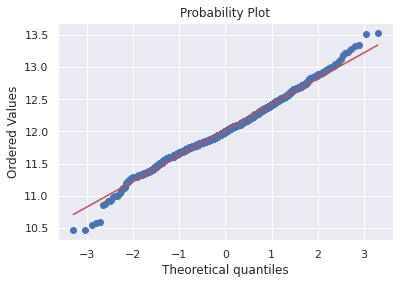

In [ ]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

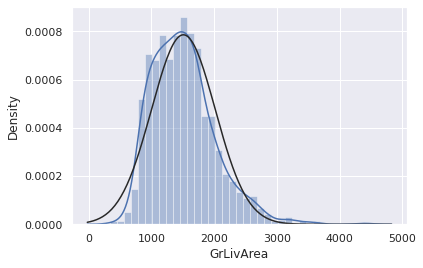

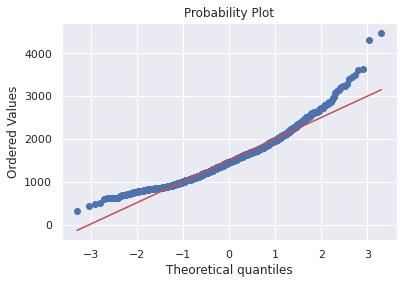

In [ ]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [ ]:
#Log transformation 
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

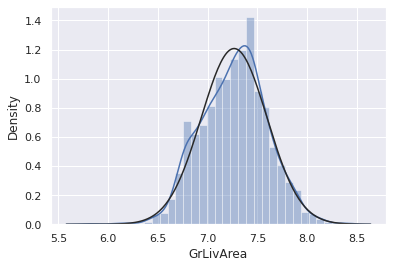

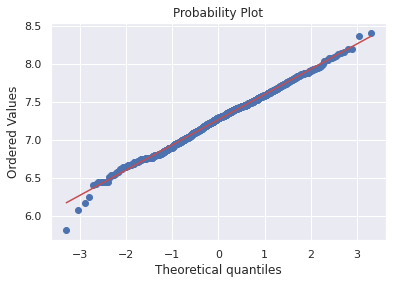

In [ ]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

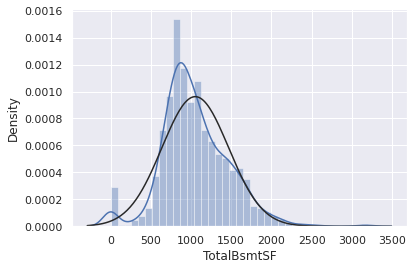

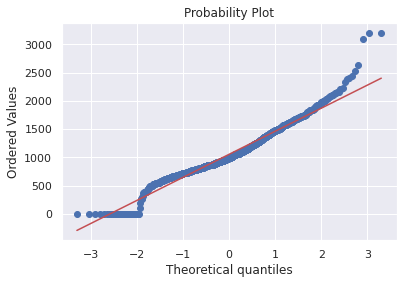

In [ ]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [ ]:
#Log transformation 
df_train['TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [ ]:
df_train['']df_train['TotalBsmtSF'][df_train['TotalBsmtSF']<0].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')

In [ ]:
df_train.loc[df_train['TotalBsmtSF']<0,'TotalBsmtSF'] = 0


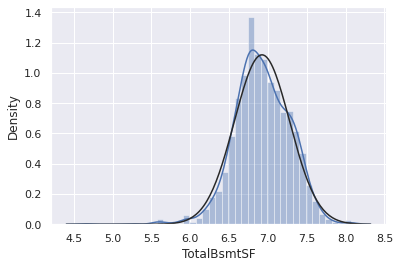

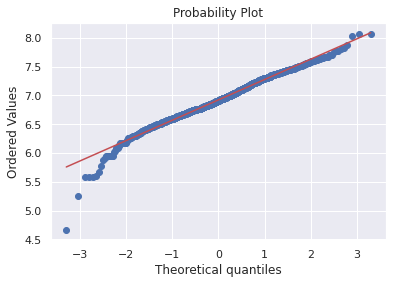

In [ ]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

Test Homoscedasticity:


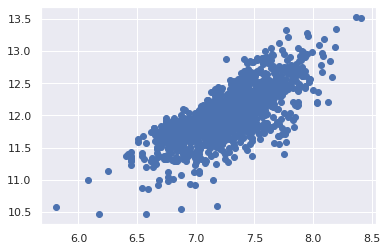

In [ ]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

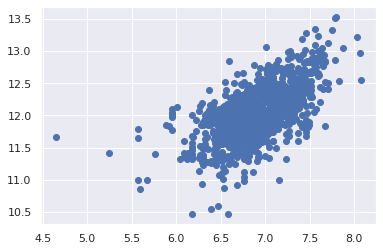

In [ ]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], 
            df_train[df_train['TotalBsmtSF']>0]['SalePrice']);